Mounted at /content/drive
데이터 shape: (400, 51)
Class 종류: ['relax' 'happy' 'sad' 'angry']
삭제된 문자열 컬럼: []
새 shape: (400, 51)


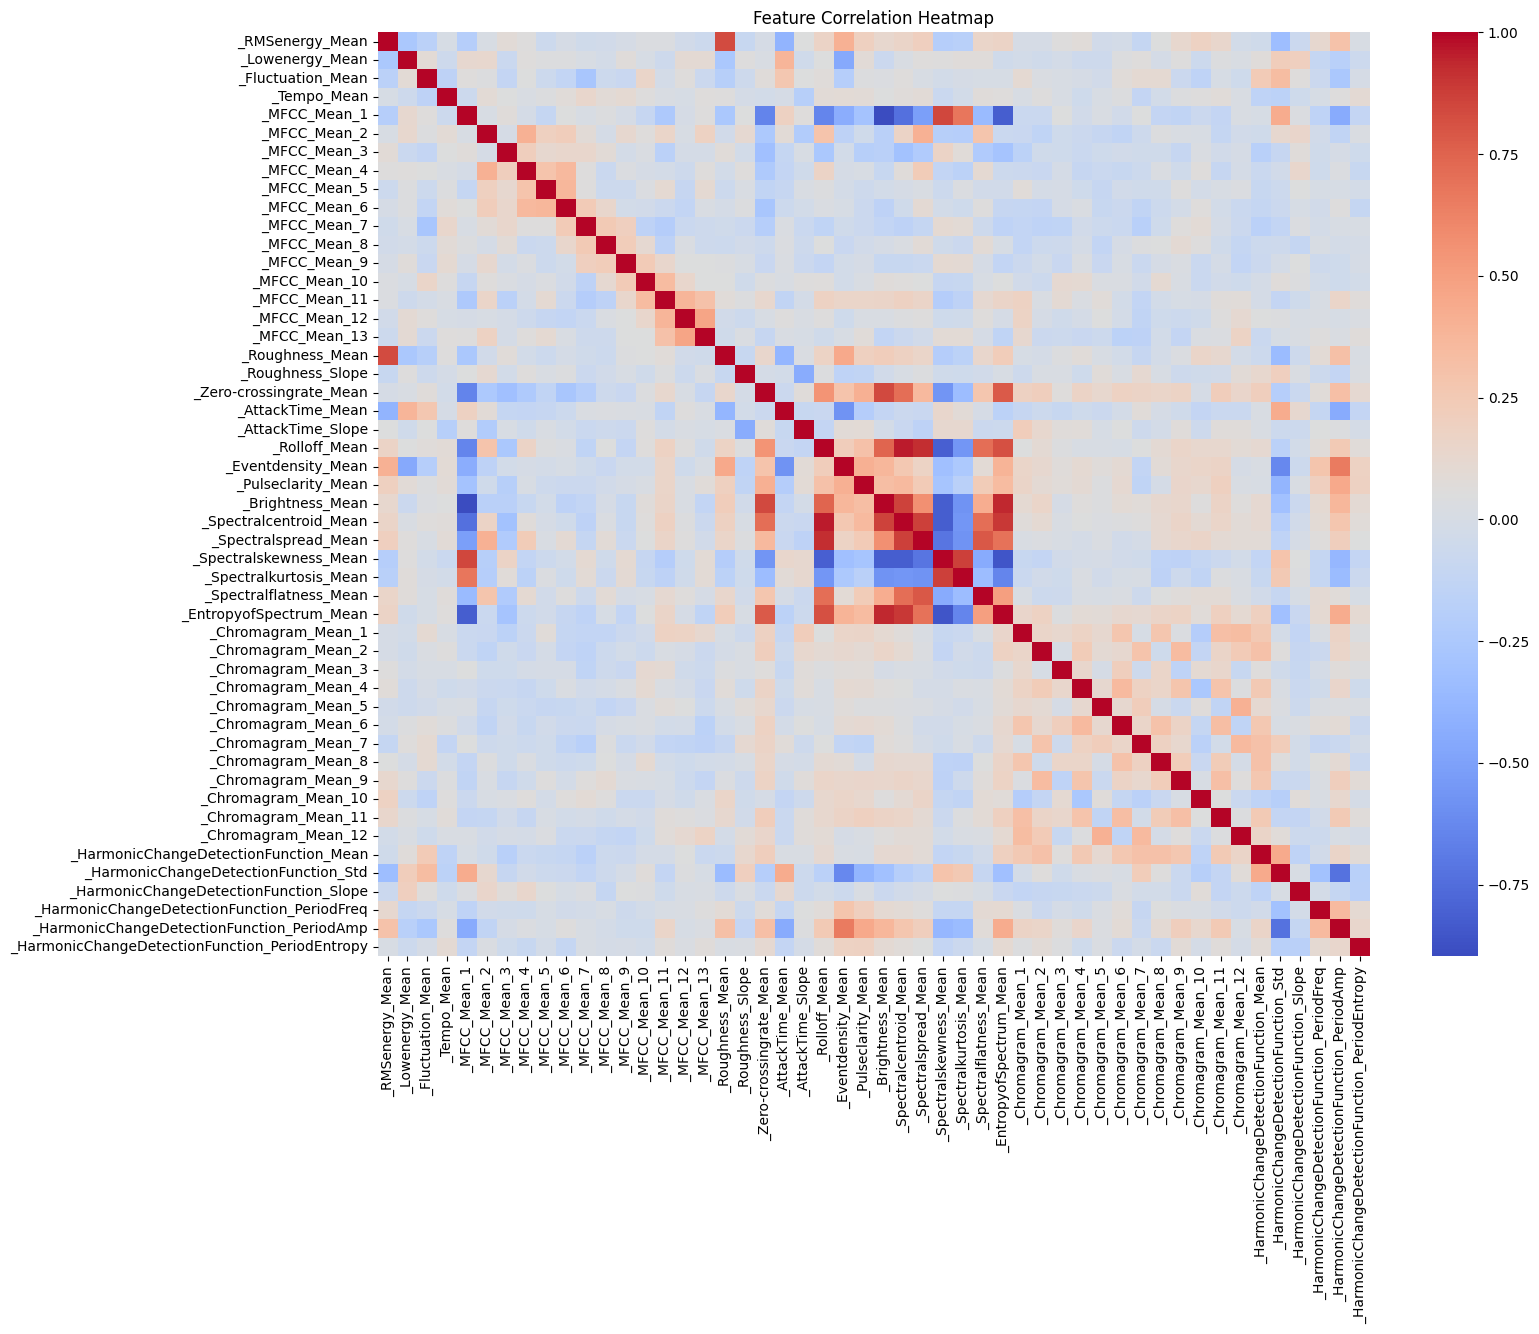

RandomForest Top 30 Features:
                                            feature  importance
45            _HarmonicChangeDetectionFunction_Std    0.086680
48      _HarmonicChangeDetectionFunction_PeriodAmp    0.084641
19                         _Zero-crossingrate_Mean    0.079076
2                                _Fluctuation_Mean    0.054338
24                              _Pulseclarity_Mean    0.041342
23                              _Eventdensity_Mean    0.038815
44           _HarmonicChangeDetectionFunction_Mean    0.038514
31                         _EntropyofSpectrum_Mean    0.038455
5                                     _MFCC_Mean_2    0.033435
25                                _Brightness_Mean    0.029624
20                                _AttackTime_Mean    0.025032
7                                     _MFCC_Mean_4    0.021227
4                                     _MFCC_Mean_1    0.018657
38                              _Chromagram_Mean_7    0.017558
18                      

/tmp/ipython-input-208600562.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='feature', x='importance', data=top30, palette='viridis')


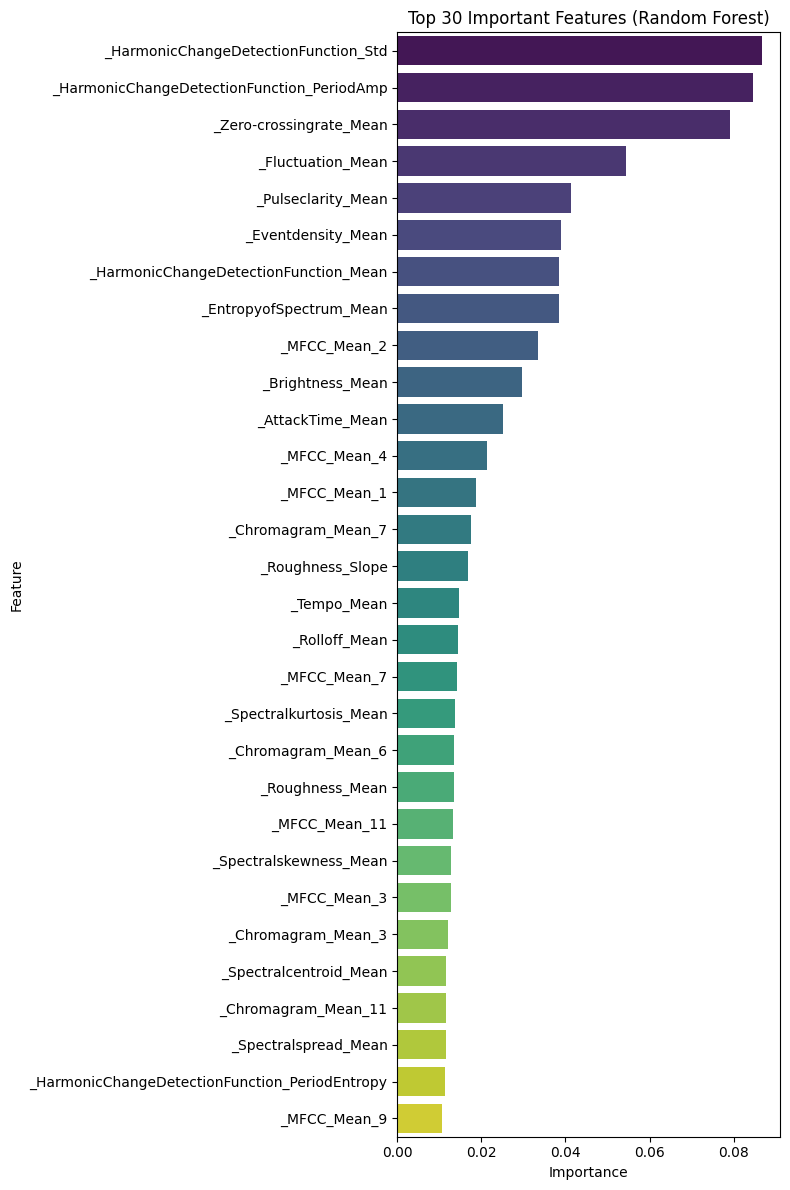

In [1]:
# ------------------------------
# 1. 데이터 불러오기
# ------------------------------
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path = '/content/drive/MyDrive/2025 duksung/빅데이터 시각화/Acoustic Features.csv'
df = pd.read_csv(path)

print("데이터 shape:", df.shape)
print("Class 종류:", df['Class'].unique())


# ------------------------------
# 2. 불필요한 feature 제거
# (문자열 컬럼, ID, 파일명 등 제거)
# ------------------------------
drop_cols = [col for col in df.columns
             if df[col].dtype == 'object' and col != 'Class']

df = df.drop(columns=drop_cols)
print("삭제된 문자열 컬럼:", drop_cols)
print("새 shape:", df.shape)


# ------------------------------
# 3. 결측치 처리
# 숫자형 → 평균값으로 채우기
# ------------------------------
df = df.fillna(df.mean(numeric_only=True))


# ------------------------------
# 4. 독립변수(X), 종속변수(y) 분리
# ------------------------------
X = df.drop(columns=['Class'])
y = df['Class']


# ------------------------------
# 5. Train/Test split
# ------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ------------------------------
# 6. 스케일링(StandardScaler)
# ------------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# ------------------------------
# 7. 상관분석 (시각화 포함)
# ------------------------------
plt.figure(figsize=(16, 12))
sns.heatmap(pd.DataFrame(X_train_scaled, columns=X.columns).corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# ------------------------------
# 8. 랜덤포레스트 기반 Feature Importance
# ------------------------------
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)


# ------------------------------
# 9. 상위 30개 중요 변수 추출
# ------------------------------
top30 = feature_importance.head(30)
print("RandomForest Top 30 Features:\n", top30)


# ------------------------------
# 10. Top30 바 차트 시각화
# ------------------------------
plt.figure(figsize=(8, 12))
sns.barplot(y='feature', x='importance', data=top30, palette='viridis')
plt.title("Top 30 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



Top30 Features:
['_HarmonicChangeDetectionFunction_Std', '_HarmonicChangeDetectionFunction_PeriodAmp', '_Zero-crossingrate_Mean', '_Fluctuation_Mean', '_Pulseclarity_Mean', '_Eventdensity_Mean', '_HarmonicChangeDetectionFunction_Mean', '_EntropyofSpectrum_Mean', '_MFCC_Mean_2', '_Brightness_Mean', '_AttackTime_Mean', '_MFCC_Mean_4', '_MFCC_Mean_1', '_Chromagram_Mean_7', '_Roughness_Slope', '_Tempo_Mean', '_Rolloff_Mean', '_MFCC_Mean_7', '_Spectralkurtosis_Mean', '_Chromagram_Mean_6', '_Roughness_Mean', '_MFCC_Mean_11', '_Spectralskewness_Mean', '_MFCC_Mean_3', '_Chromagram_Mean_3', '_Spectralcentroid_Mean', '_Chromagram_Mean_11', '_Spectralspread_Mean', '_HarmonicChangeDetectionFunction_PeriodEntropy', '_MFCC_Mean_9']
새 데이터셋 shape: (400, 30)
랜덤포레스트 (Top30) Accuracy: 0.775

Classification Report (Top30):

              precision    recall  f1-score   support

       angry       0.88      0.75      0.81        20
       happy       0.83      1.00      0.91        20
       relax       0.

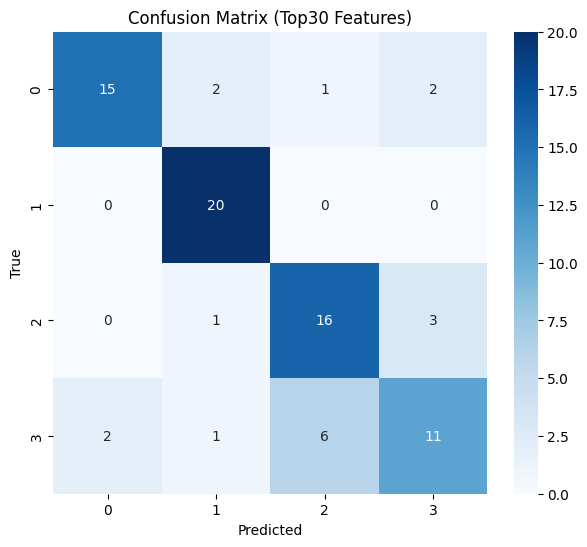

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


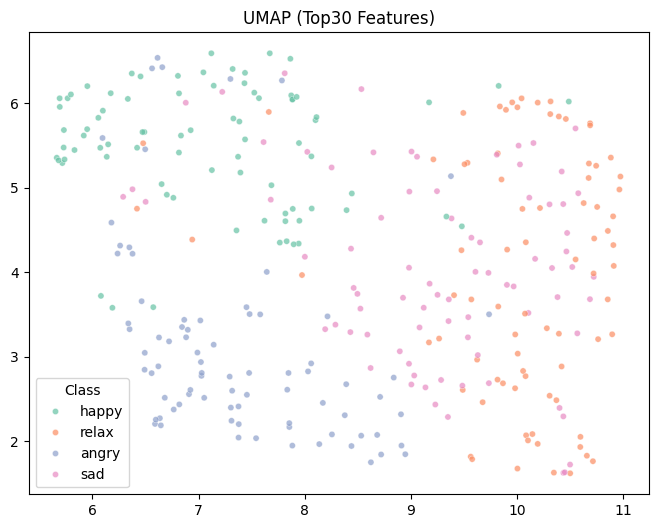

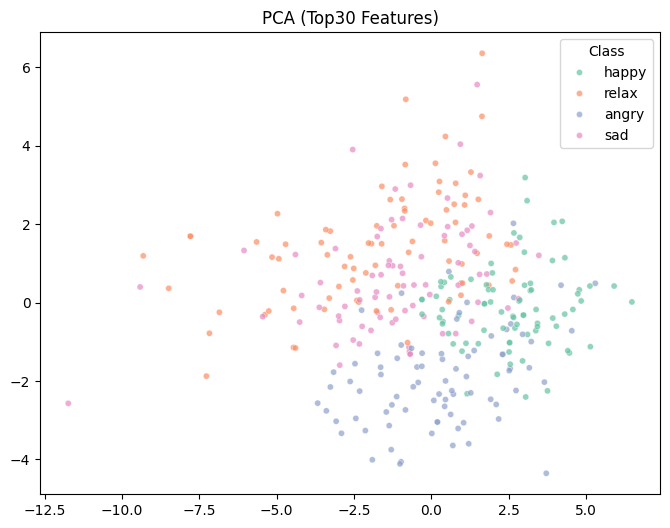

In [2]:
# --------------------------------------------------
# 0. 사전작업: top30 리스트가 이미 존재한다고 가정
# top30: feature_importance.head(30) 결과
# --------------------------------------------------

top30_features = list(top30['feature'])

print("Top30 Features:")
print(top30_features)

# --------------------------------------------------
# 1. Top30 변수만 남긴 새로운 데이터셋 구성
# → 모델이 더 가볍고 규칙이 더 명확해짐
# → 불필요한 변수로 인한 noise 제거
# --------------------------------------------------
df_top30 = df[top30_features + ['Class']]
X = df_top30.drop(columns=['Class'])
y = df_top30['Class']

print("새 데이터셋 shape:", X.shape)


# --------------------------------------------------
# 2. Train/Test split
# --------------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# --------------------------------------------------
# 3. 스케일링
# --------------------------------------------------
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# --------------------------------------------------
# 4. RandomForest 재학습 (Top30만 사용)
# 정확도 비교 가능
# 중요 변수만 가지고도 성능이 유지되는지 확인
# 발표 시 “Feature selection의 효과” 설명 가능
# --------------------------------------------------
from sklearn.ensemble import RandomForestClassifier

rf30 = RandomForestClassifier(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
rf30.fit(X_train_scaled, y_train)


# --------------------------------------------------
# 5. 모델 성능 평가
# --------------------------------------------------
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf30.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print("랜덤포레스트 (Top30) Accuracy:", acc)
print("\nClassification Report (Top30):\n")
print(classification_report(y_test, y_pred))


# --------------------------------------------------
# 6. Confusion Matrix 시각화
# 어떤 감정이 잘 예측되고 어떤 감정끼리 헷갈리는지 다시 분석 가능
# --------------------------------------------------
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (Top30 Features)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# ==================================================
# 7. UMAP 시각화 (Top30만 사용)
# top30만 사용했을 때 군집 분리가 더 잘 보이면 → “Feature selection 성공”
# 분리가 더 안 되면 → 개선 필요 또는 다른 방식 특히 UMAP parameter 튜닝 가능
# ==================================================
import umap.umap_ as umap

umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)

X_umap = umap_model.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_umap[:,0], y=X_umap[:,1],
    hue=y_train,
    palette="Set2",
    s=20, alpha=0.7
)
plt.title("UMAP (Top30 Features)")
plt.show()


# ==================================================
# 8. PCA 시각화 (Top30)
# ==================================================
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=y_train,
    palette="Set2",
    s=20, alpha=0.7
)
plt.title("PCA (Top30 Features)")
plt.show()


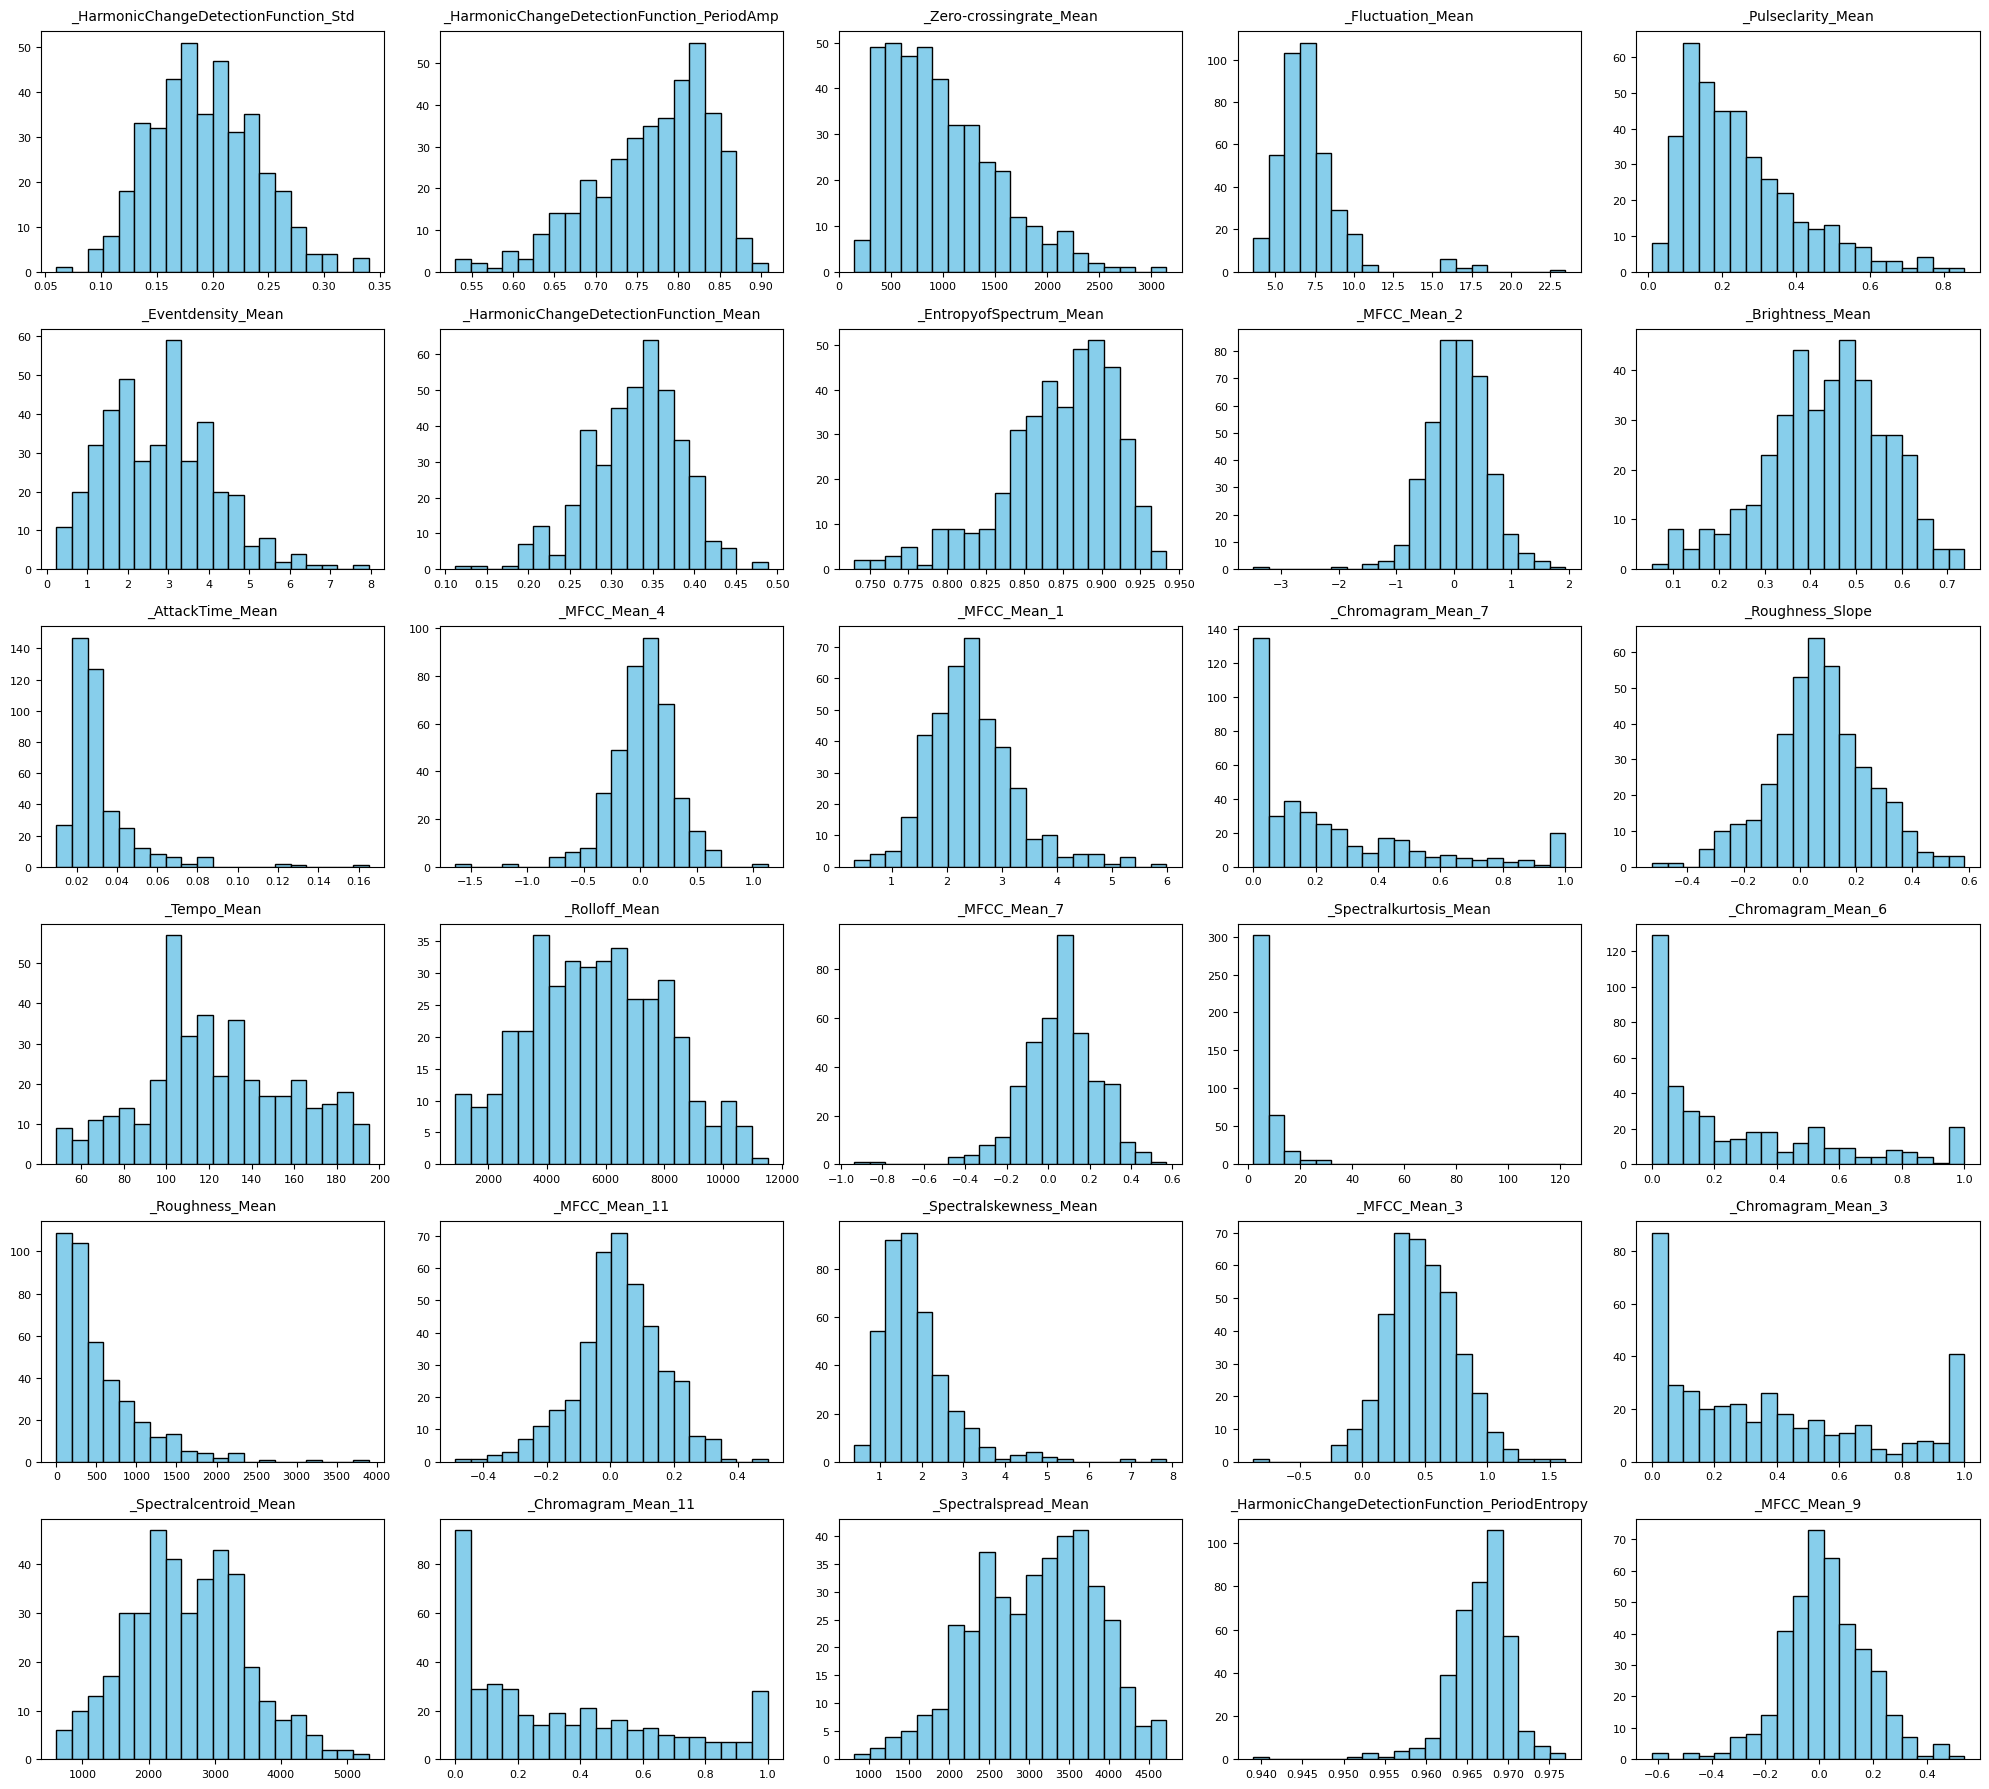

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# X: 사용 중인 feature DataFrame
# 예: X = df[top30_features]

cols = X.columns
n_cols = 5  # 한 줄에 5개 그래프
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))
axes = axes.ravel()

for idx, col in enumerate(cols):
    ax = axes[idx]
    ax.hist(X[col], bins=20, color='skyblue', edgecolor='black')

    # 제목은 1) 글자 크기 키우고, 2) 줄바꿈, 3) 가운데 정렬
    ax.set_title(col, fontsize=10, pad=8)

    # y축 틱 너무 많으면 제거
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=8)

# 남는 subplot칸 비우기
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


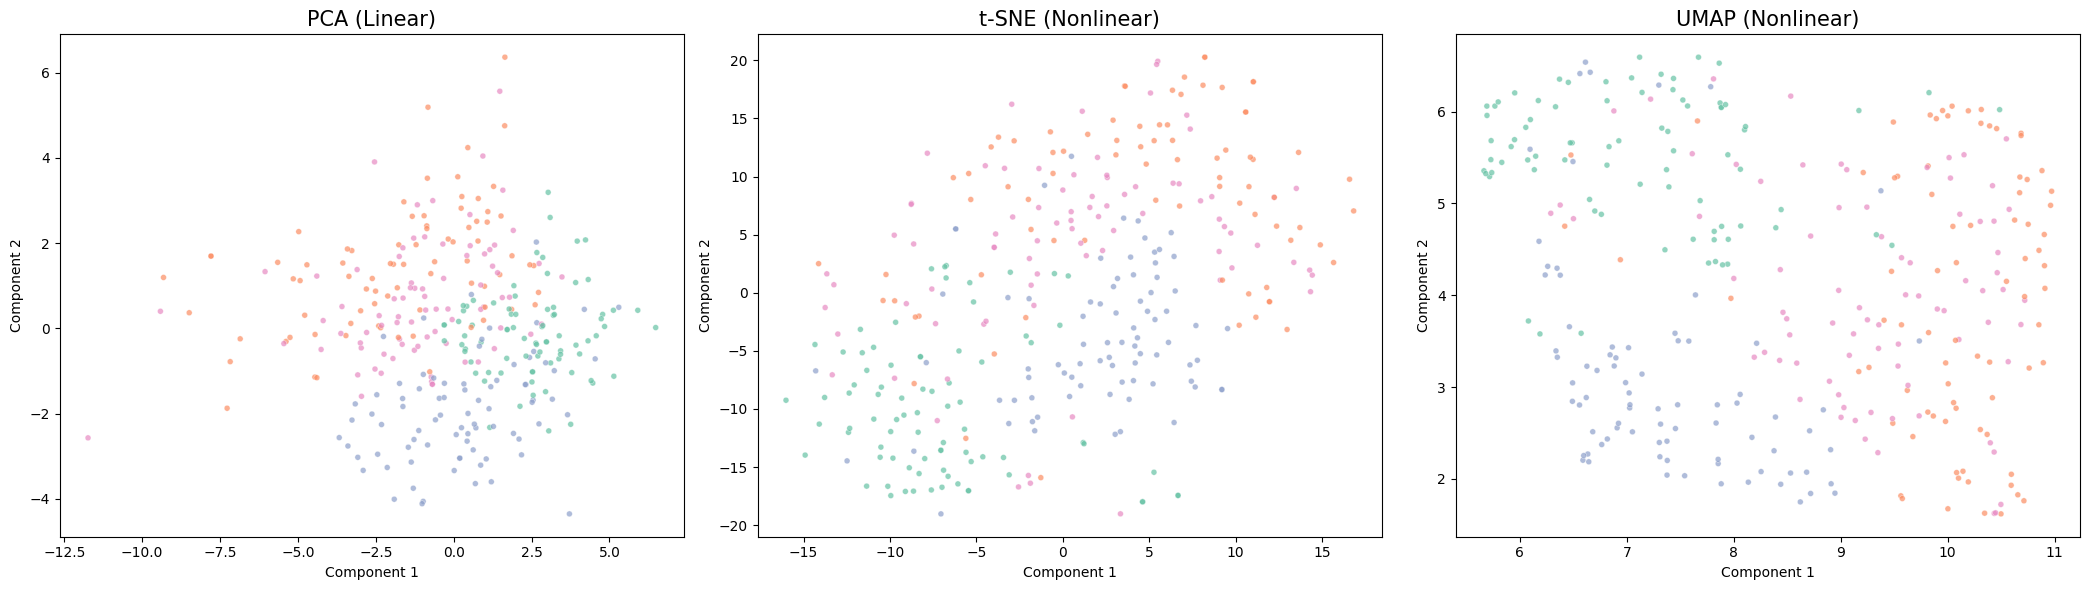

In [4]:
# PCA / t-SNE / UMAP 비교 (2D)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# --------------------------
# 1) PCA 변환
# --------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# --------------------------
# 2) t-SNE 변환
# --------------------------
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    n_iter=1000,
    random_state=42
)
X_tsne = tsne.fit_transform(X_train_scaled)

# --------------------------
# 3) UMAP 변환
# --------------------------
umap_model = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)
X_umap = umap_model.fit_transform(X_train_scaled)

# --------------------------
# 4) 한눈에 비교하는 subplot
# --------------------------
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
methods = ["PCA (Linear)", "t-SNE (Nonlinear)", "UMAP (Nonlinear)"]
datasets = [X_pca, X_tsne, X_umap]
palette = sns.color_palette("Set2", len(np.unique(y_train)))

for ax, data, title in zip(axes, datasets, methods):
    sns.scatterplot(
        x=data[:,0], y=data[:,1],
        hue=y_train,
        palette=palette,
        s=18, alpha=0.7,
        ax=ax,
        legend=False
    )
    ax.set_title(title, fontsize=15)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


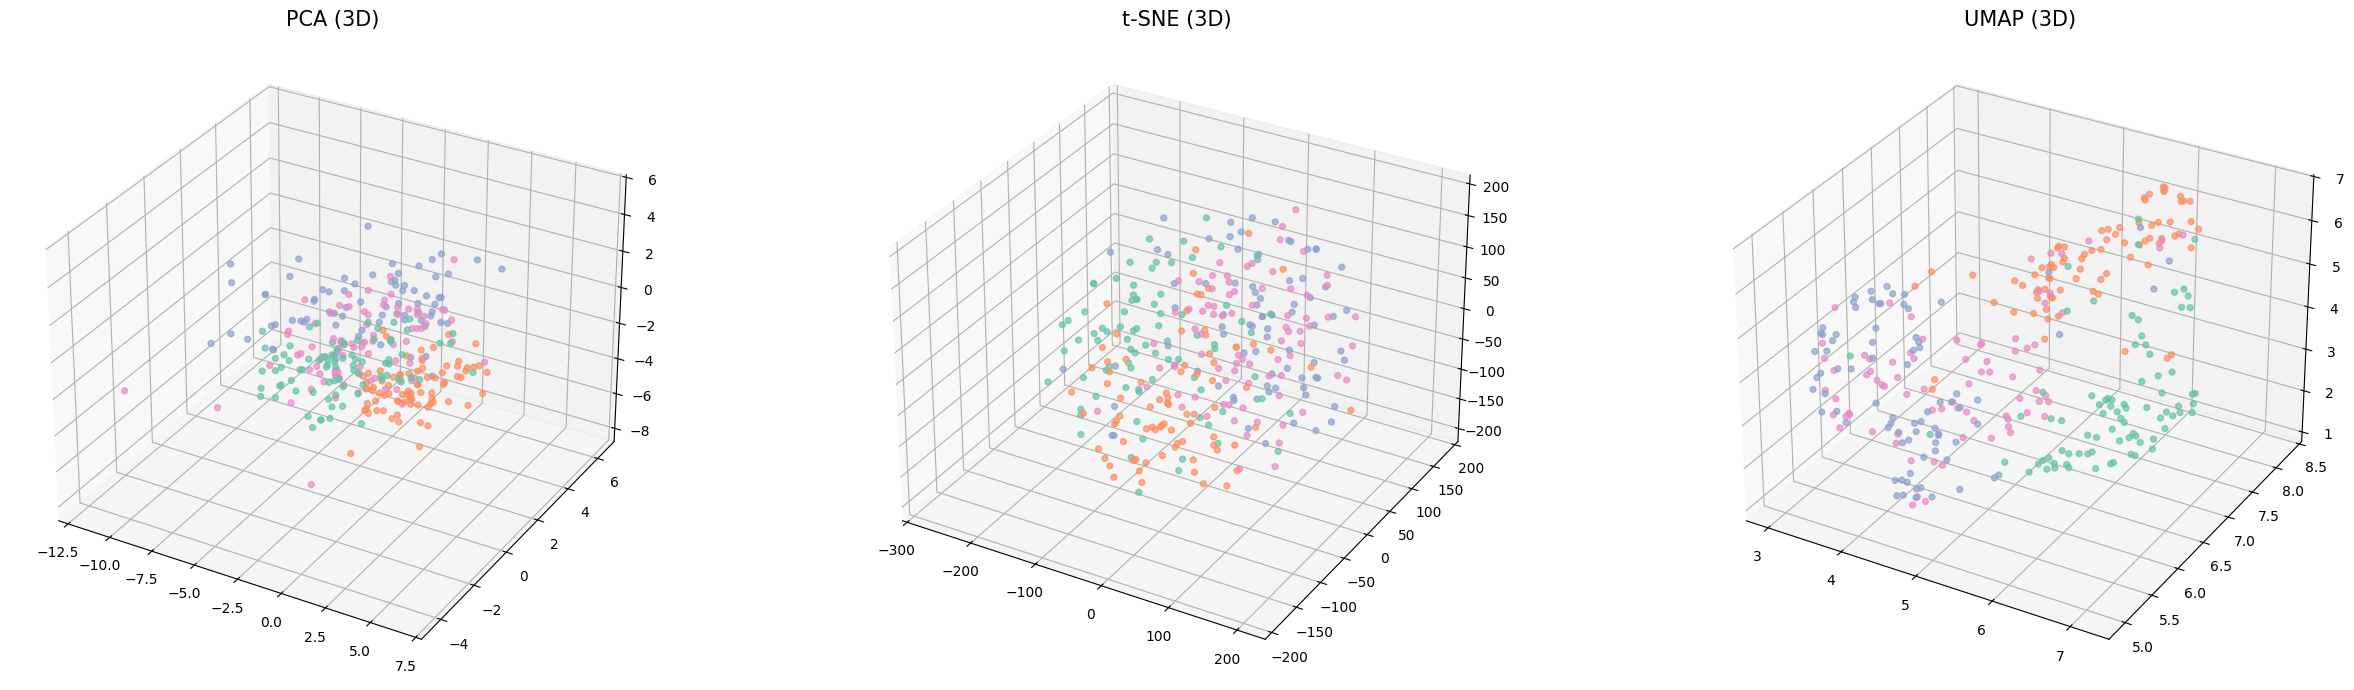

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

palette = sns.color_palette("Set2", len(np.unique(y_train)))

# --------------------------
# 1) PCA 3D
# --------------------------
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_train_scaled)

# --------------------------
# 2) t-SNE 3D
# --------------------------
tsne3 = TSNE(
    n_components=3,
    perplexity=30,
    learning_rate=200,
    n_iter=1200,
    random_state=42
)
X_tsne3 = tsne3.fit_transform(X_train_scaled)

# --------------------------
# 3) UMAP 3D
# --------------------------
umap3 = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=3,
    random_state=42
)
X_umap3 = umap3.fit_transform(X_train_scaled)

# --------------------------
# 4) 3D subplot 생성
# --------------------------
fig = plt.figure(figsize=(26, 7))

# --- PCA Plot ---
ax1 = fig.add_subplot(131, projection='3d')
for label, color in zip(np.unique(y_train), palette):
    pts = X_pca3[y_train == label]
    ax1.scatter(pts[:,0], pts[:,1], pts[:,2], s=18, color=color, alpha=0.7, label=str(label))
ax1.set_title("PCA (3D)", fontsize=15)

# --- t-SNE Plot ---
ax2 = fig.add_subplot(132, projection='3d')
for label, color in zip(np.unique(y_train), palette):
    pts = X_tsne3[y_train == label]
    ax2.scatter(pts[:,0], pts[:,1], pts[:,2], s=18, color=color, alpha=0.7, label=str(label))
ax2.set_title("t-SNE (3D)", fontsize=15)

# --- UMAP Plot ---
ax3 = fig.add_subplot(133, projection='3d')
for label, color in zip(np.unique(y_train), palette):
    pts = X_umap3[y_train == label]
    ax3.scatter(pts[:,0], pts[:,1], pts[:,2], s=18, color=color, alpha=0.7, label=str(label))
ax3.set_title("UMAP (3D)", fontsize=15)

plt.tight_layout()
plt.show()

In [27]:
# 설치 (한 번만)
!pip install plotly umap-learn --quiet

# 필요 라이브러리
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# ------------------------
# 1) 3D 차원축소 수행
# ------------------------
# (X_train_scaled: numpy array or DataFrame, y_train: numpy array/Series)
# 예) X_train_scaled.shape == (n_samples, n_features)

# PCA 3D
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(X_train_scaled)

# t-SNE 3D (시간 걸릴 수 있음)
tsne3 = TSNE(n_components=3, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne3 = tsne3.fit_transform(X_train_scaled)

# UMAP 3D
umap3 = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
X_umap3 = umap3.fit_transform(X_train_scaled)

# ------------------------
# 2) 색상/레이블 준비
# ------------------------
# 레이블이 정수(0..k-1) 또는 문자열 상관 없음 — 문자열이면 그대로 사용
labels = np.array(y_train)
unique_labels = np.unique(labels)

# Plotly의 질적 팔레트 사용
palette = px.colors.qualitative.Set2
# 팔레트가 클래스 수보다 적을 수 있으니 반복
colors = {lab: palette[i % len(palette)] for i, lab in enumerate(unique_labels)}

# hover text
hover_texts = [f"idx: {i} | label: {lab}" for i, lab in enumerate(labels)]

# ------------------------
# 3) Plotly 서브플롯 (1x3) - 각 칸에 3D scatter
# ------------------------
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{"type":"scene"}, {"type":"scene"}, {"type":"scene"}]],
    subplot_titles=("PCA (3D)", "t-SNE (3D)", "UMAP (3D)")
)

# helper to add traces per method
def add_3d_scatter(fig, X3, row, col, name_prefix):
    for lab in unique_labels:
        mask = (labels == lab)
        fig.add_trace(
            go.Scatter3d(
                x = X3[mask, 0],
                y = X3[mask, 1],
                z = X3[mask, 2],
                mode = "markers",
                marker = dict(size=3.5),
                name = f"{name_prefix}: {lab}",
                legendgroup = str(lab),
                marker_color = colors[lab],
                hovertext = [f"idx: {i} | label: {lab}" for i in np.where(mask)[0]],
                hoverinfo = "text"
            ),
            row=row, col=col
        )

# 추가
add_3d_scatter(fig, X_pca3, row=1, col=1, name_prefix="PCA")
add_3d_scatter(fig, X_tsne3, row=1, col=2, name_prefix="t-SNE")
add_3d_scatter(fig, X_umap3, row=1, col=3, name_prefix="UMAP")

# 레이아웃(씬별 카메라/축 타이틀 정리)
fig.update_layout(
    height=600, width=1500,
    title_text="3D Comparison: PCA vs t-SNE vs UMAP (Interactive)",
    showlegend=True
)

# 각 scene(서브플롯) 축 레이블 통일
for i, name in enumerate(["scene","scene2","scene3"], start=1):
    fig['layout'][name]['xaxis']['title'] = 'Dim 1'
    fig['layout'][name]['yaxis']['title'] = 'Dim 2'
    fig['layout'][name]['zaxis']['title'] = 'Dim 3'

fig.show()

# (선택) 결과를 HTML로 저장해서 공유 가능
# fig.write_html("3d_dim_reduction_comparison.html")


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



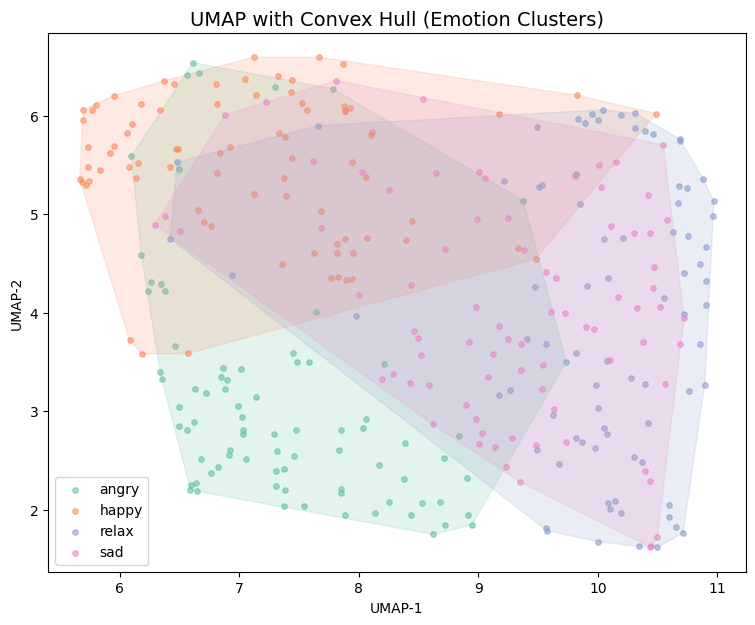

In [7]:
# UMAP + Convex Hull (감정별 군집 경계 시각화)
# angry/happy 군집은 분리도가 높음 → 에너지·밝기 등 특징이 뚜렷해서 분할 가능
# relax/sad 군집 경계가 중첩됨 → 실제 데이터에서도 유사한 음향 특성을 가짐
# → 모델이 헷갈리는 이유가 데이터 구조에서 확인됨

# 고차원 음향 데이터의 감정별 군집 영역을 명확하게 보여주며,
# relax와 sad가 실제 데이터 공간에서도 겹친다는 사실을 확인할 수 있

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import seaborn as sns
import umap.umap_ as umap

# UMAP 변환
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_train_scaled)

labels = np.unique(y_train)
colors = sns.color_palette("Set2", len(labels))

plt.figure(figsize=(9,7))

for label, color in zip(labels, colors):
    points = X_umap[y_train == label]

    # 산점도
    plt.scatter(points[:,0], points[:,1], s=15, alpha=0.6, label=str(label), color=color)

    # Convex Hull (군집 경계)
    if len(points) > 2:
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]
        plt.fill(hull_points[:,0], hull_points[:,1], color=color, alpha=0.18)

plt.title("UMAP with Convex Hull (Emotion Clusters)", fontsize=14)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend()
plt.show()


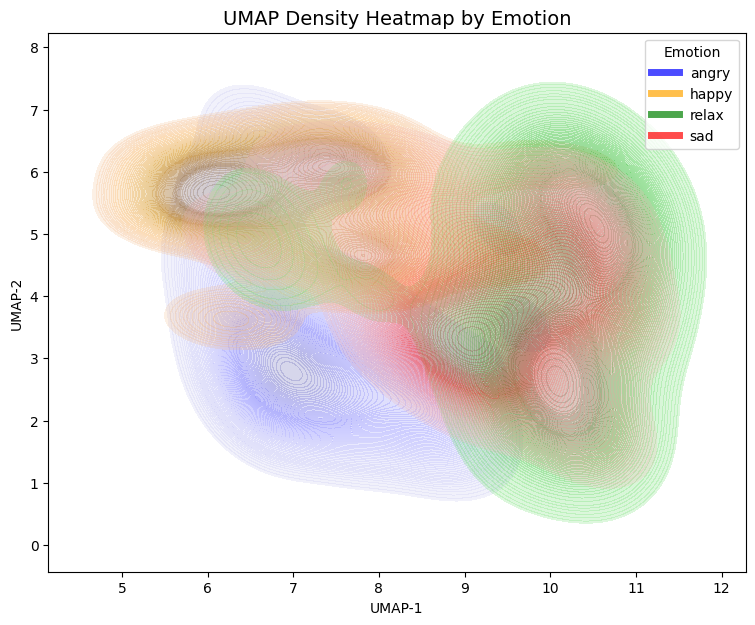

In [8]:
# UMAP + Density Heatmap (감정별 밀도 지도)
# 고밀도 중심(center of mass) 위치 비교 가능
# 군집이 작아 보이지만 밀도는 높을 수 있음
# relax–sad 겹침이 더 명확하게 드러남
# 모델이 어려워하는 원인을 데이터 구조까지 확장해 설명 가능

# 감정별 고밀도 중심 위치를 비교해보면 angry와 happy는 분리되지만
# relax와 sad는 밀도 중심이 거의 동일

plt.figure(figsize=(9,7))
colors = ['blue', 'orange', 'green', 'red'] # kdeplot에서 사용할 색상 리스트 가정
label_names = ['angry', 'happy', 'relax', 'sad'] # 실제 레이블 이름

for i, label in enumerate(labels):
    # 1. kdeplot으로 밀도 히트맵 생성 (범례 항목 생성 X)
    subset = X_umap[y_train == label]
    sns.kdeplot(
        x=subset[:,0],
        y=subset[:,1],
        fill=True,
        alpha=0.22,
        # cmap을 지정하면 label이 무시될 수 있으므로, color를 직접 지정하는 것이 더 안전함
        color=colors[i],
        levels=80,
        thresh=0.05,
    )

    # 2. 범례에 사용할 '점' 또는 '선'을 추가 (실제 데이터에 영향을 주지 않음)
    # 빈 데이터를 사용하여 해당 색상과 이름으로 범례 항목만 생성
    plt.plot([], [],
             color=colors[i],
             label=label_names[i],
             alpha=0.7,
             lw=5) # 두꺼운 선으로 밀도 영역을 연상하게 함

plt.title("UMAP Density Heatmap by Emotion", fontsize=14)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title="Emotion") # 이제 범례가 표시됨
plt.show()


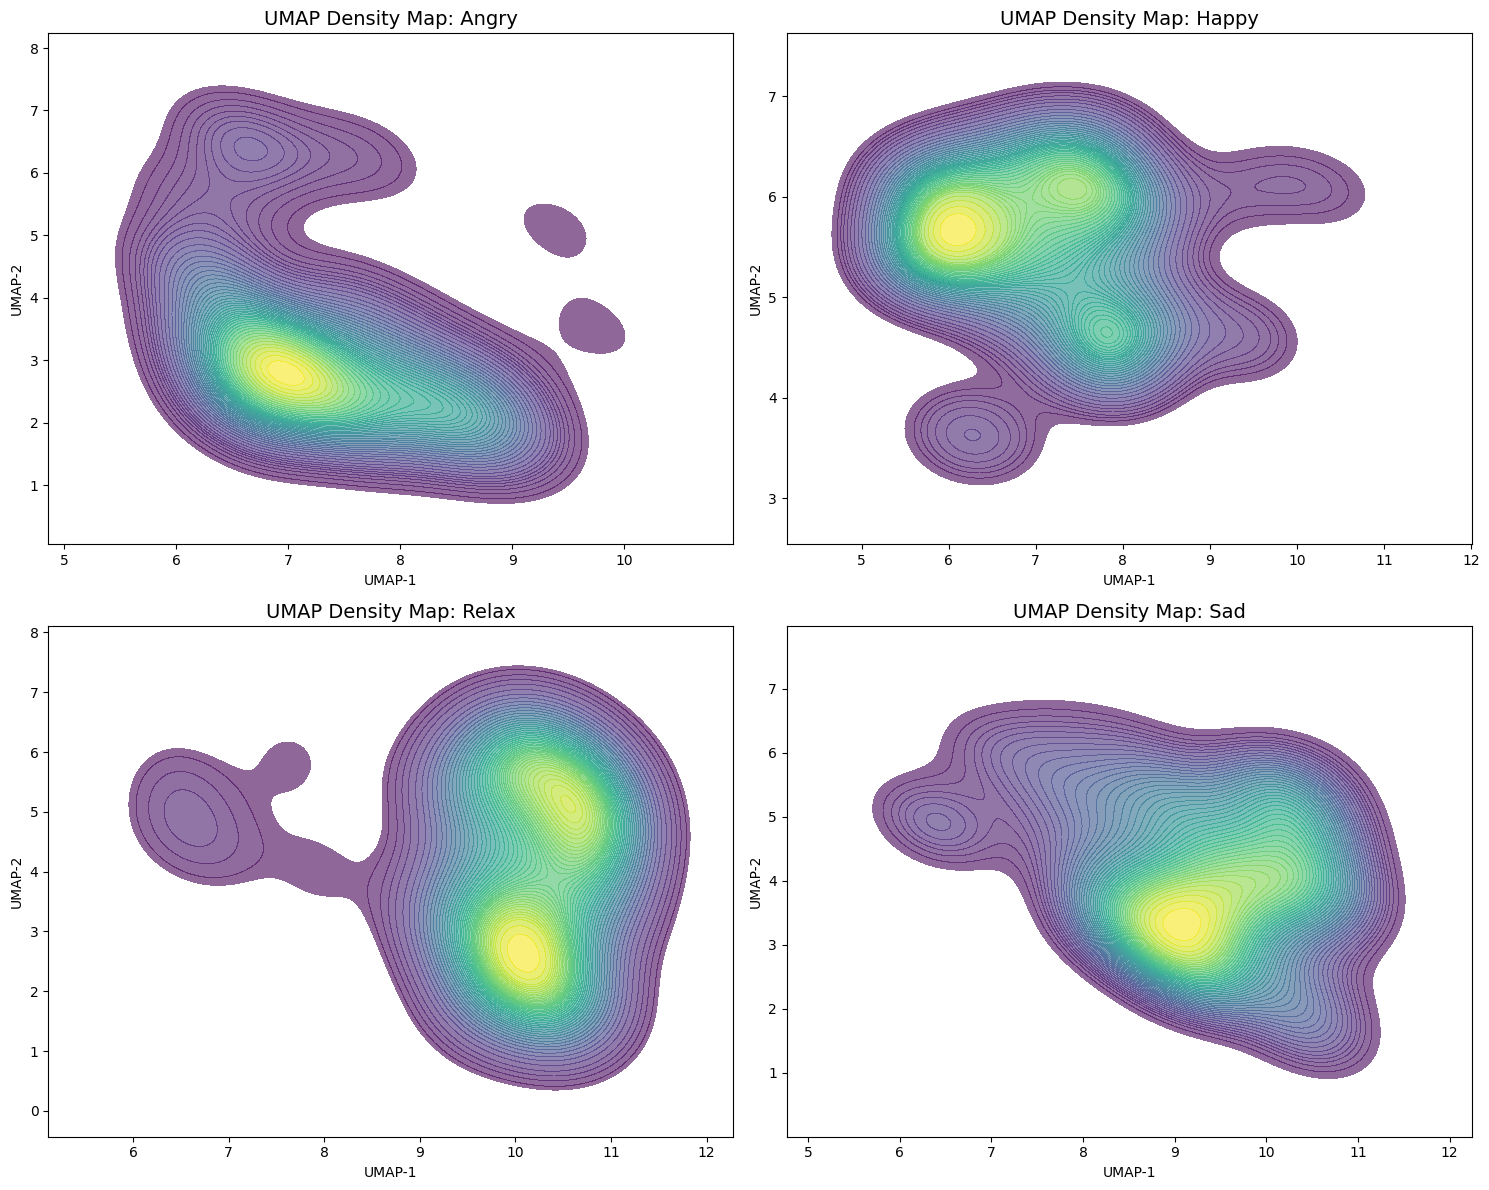

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # 2x2 서브플롯 생성
axes = axes.flatten() # 2차원 배열을 1차원으로 변환하여 쉽게 접근

for i, label in enumerate(labels):
    subset = X_umap[y_train == label]

    # 해당 서브플롯에 kdeplot 그리기
    sns.kdeplot(
        x=subset[:, 0],
        y=subset[:, 1],
        ax=axes[i], # axes[i]에 그림
        fill=True,
        alpha=0.6,
        cmap="viridis", # 또는 원하는 단일 색상으로 지정
        levels=50,
        thresh=0.05
    )

    # 서브플롯 제목 설정
    axes[i].set_title(f"UMAP Density Map: {label.capitalize()}", fontsize=14)
    axes[i].set_xlabel("UMAP-1")
    axes[i].set_ylabel("UMAP-2")

plt.tight_layout() # 그래프 간 간격 자동 조정
plt.show()

**Prototype Center Map은**
각 감정 클래스의 “대표적인 음향 특징 벡터(centroid)”를 구해
이를 UMAP 공간에 투영해서


각 감정이 어떤 특징 구조를 갖는지
그리고 감정 간 거리가 어떻게 다른지를
직관적으로 시각화하는 기법

단순 scatter보다
각 감정의 평균적 패턴이 어디에 위치하는지를 보여줌

angry–happy는 멀리 떨어져 있고
relax–sad는 가까운지
→ 감정 간 유사도 구조를 “거리”로 해석 가능

발표할 때 “감정 간 구조적 관계를 정량적으로 보여준 분석”으로 매우 높은 평가

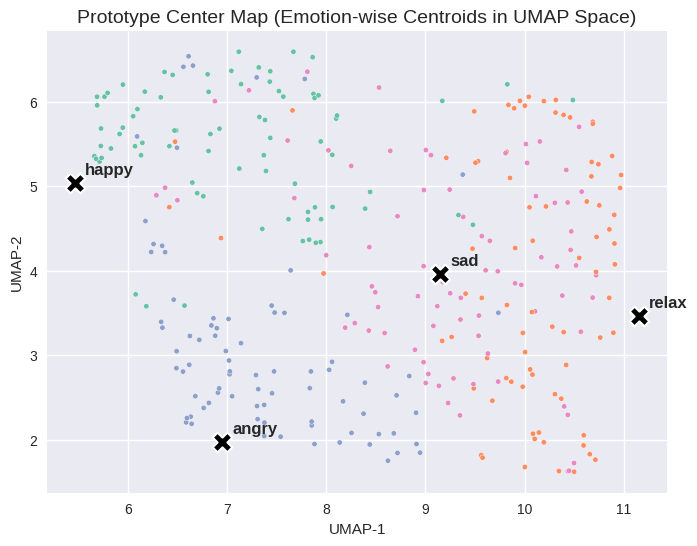

In [19]:
# 각 감정 클래스별 centroid(평균 벡터) 계산

import numpy as np
import pandas as pd

# X_train_scaled: array or DataFrame (top30 scaled)
# y_train: 감정 레이블 (string 또는 int)

labels = np.unique(y_train)
centroids = {}

for lab in labels:
    centroids[lab] = X_train_scaled[y_train == lab].mean(axis=0)

# centroid들을 UMAP 공간으로 투영
# UMAP 모델이 이미 fit되어 있어야 함
centroid_vectors = np.vstack(list(centroids.values()))

centroid_umap = umap_model.transform(centroid_vectors)

# label 순서 맞춰 저장
centroid_df = pd.DataFrame({
    "label": labels,
    "umap1": centroid_umap[:,0],
    "umap2": centroid_umap[:,1]
})

# 실제 데이터 + centroid 시각
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))

# 1) 원본 UMAP 데이터 산점도 (점은 흐리게)
sns.scatterplot(
    x=X_umap[:,0], y=X_umap[:,1],
    hue=y_train,
    palette="Set2",
    alpha=1,
    s=15,
    legend=False
)

# 2) 각 감정 centroid 표시
for i, row in centroid_df.iterrows():
    plt.scatter(row["umap1"], row["umap2"],
                color="black", s=200, marker="X", edgecolor="white", linewidth=1.5)
    plt.text(row["umap1"]+0.1, row["umap2"]+0.1, row["label"],
             fontsize=12, weight="bold")

plt.title("Prototype Center Map (Emotion-wise Centroids in UMAP Space)", fontsize=14)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.show()


감정 간 중심 거리
          angry     happy     relax       sad
angry  0.000000  3.606713  4.052160  3.286224
happy  3.606713  0.000000  5.027681  3.976684
relax  4.052160  5.027681  0.000000  2.197483
sad    3.286224  3.976684  2.197483  0.000000


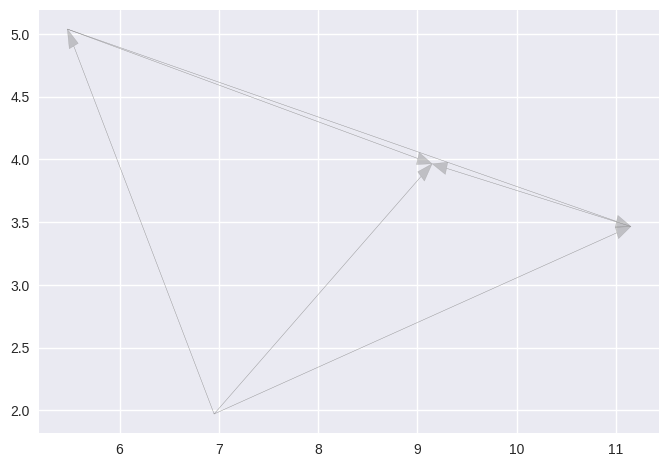

In [20]:
# 감정간 거리(유사도) 계산 + 화살표로 표시
# centroid 거리 계산
from scipy.spatial.distance import pdist, squareform

dist_mat = pdist(centroid_vectors, metric="euclidean")
dist_df = pd.DataFrame(
    squareform(dist_mat),
    index=labels,
    columns=labels
)

print("감정 간 중심 거리")
print(dist_df)

# 화살표 표시 (선택)
for i, lab1 in enumerate(labels):
    for j, lab2 in enumerate(labels):
        if i < j:
            # 두 centroid 좌표 불러오기
            x1, y1 = centroid_df.loc[i, ["umap1", "umap2"]]
            x2, y2 = centroid_df.loc[j, ["umap1", "umap2"]]

            # 화살표 그리기
            plt.arrow(x1, y1, x2-x1, y2-y1,
                      length_includes_head=True,
                      head_width=0.1, color="gray", alpha=0.4)

# *오분류 흐름 시각화 --> 모델에 대한 시각화이므로 기각*

In [11]:
# Error Flow Sankey Diagram (오분류 흐름 시각화)
# 오류의 두께가 커질수록 모델이 자주 헷갈리는 감정쌍
# relax ↔ sad 흐름이 가장 굵으면
# → Data 특징이 겹쳐 있고
# → UMAP에서도 영역 overlap 존재
# → 모델 성능 저하의 근본 원인

# 오분류된 흐름을 보면 sad가 relax로 이동하는 비율이 가장 높음,
# 두 감정이 구조적으로 유사해 모델이 혼동하는 패턴이 시각적으로 드러납니다.

!pip install plotly

import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix

# confusion matrix 계산
cm = confusion_matrix(y_test, y_pred)
labels = list(np.unique(y_test))

# Sankey용 node(label) id 생성
label_ids = {label: idx for idx, label in enumerate(labels)}

sources = []
targets = []
values = []

# 오분류된 경우만 화살표로 표시
for i, true_label in enumerate(labels):
    for j, pred_label in enumerate(labels):
        if i != j and cm[i, j] > 0:
            sources.append(label_ids[true_label])
            targets.append(label_ids[pred_label])
            values.append(cm[i, j])

# Sankey 생성
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightgray"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Emotion Misclassification Flow (Sankey Diagram)", font_size=14)
fig.show()


# *이상치만 UMAP + 클러스터 시각화 코드*

1. IsolationForest로 이상치 점수 계산

2. 이상치만 필터링

3. 이상치에 대해 UMAP 적용

4. UMAP 결과에 대해 k-means 클러스터링

5. 이상치 유형(클러스터) 시각화

🔎 Top30 변수 리스트: ['_HarmonicChangeDetectionFunction_Std', '_HarmonicChangeDetectionFunction_PeriodAmp', '_Zero-crossingrate_Mean', '_Fluctuation_Mean', '_Pulseclarity_Mean', '_Eventdensity_Mean', '_HarmonicChangeDetectionFunction_Mean', '_EntropyofSpectrum_Mean', '_MFCC_Mean_2', '_Brightness_Mean', '_AttackTime_Mean', '_MFCC_Mean_4', '_MFCC_Mean_1', '_Chromagram_Mean_7', '_Roughness_Slope', '_Tempo_Mean', '_Rolloff_Mean', '_MFCC_Mean_7', '_Spectralkurtosis_Mean', '_Chromagram_Mean_6', '_Roughness_Mean', '_MFCC_Mean_11', '_Spectralskewness_Mean', '_MFCC_Mean_3', '_Chromagram_Mean_3', '_Spectralcentroid_Mean', '_Chromagram_Mean_11', '_Spectralspread_Mean', '_HarmonicChangeDetectionFunction_PeriodEntropy', '_MFCC_Mean_9']


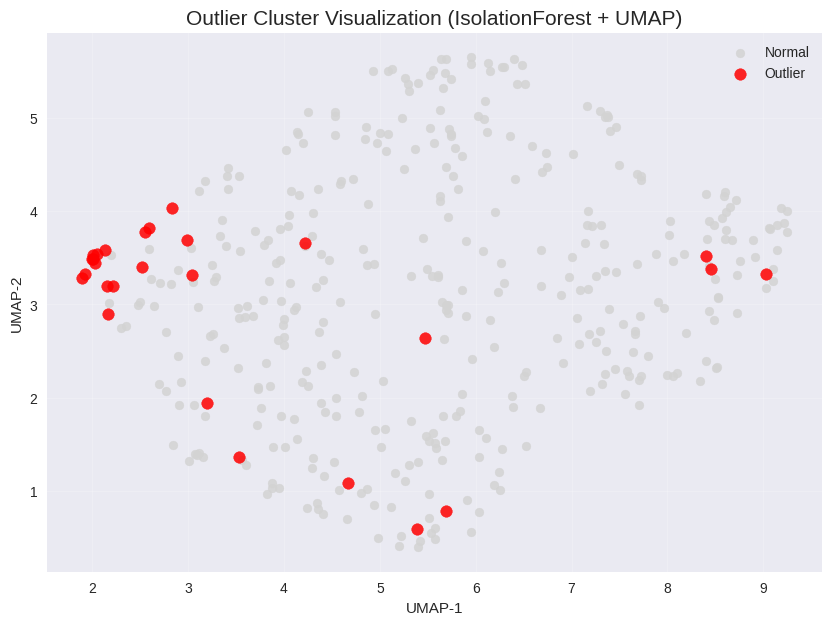


이상치 개수:
outlier
Normal     373
Outlier     27
Name: count, dtype: int64


In [26]:
# ------------------------------
# 10. Top30 변수 기반 이상치 탐지 + UMAP 시각화
# ------------------------------

import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import matplotlib.pyplot as plt

# 1) top30 변수 이름 리스트 생성
top30_features = top30['feature'].tolist()
print("🔎 Top30 변수 리스트:", top30_features)


# 2) 원본 DF에서 중요한 30개 변수만 선택
X_top30 = df[top30_features].copy()


# 3) 스케일링
scaler_30 = StandardScaler()
X_top30_scaled = scaler_30.fit_transform(X_top30)


# 4) Isolation Forest로 이상치 탐지
iso = IsolationForest(
    n_estimators=300,
    contamination="auto",
    random_state=42
)

outlier_pred = iso.fit_predict(X_top30_scaled)

# 결과 저장
df["outlier"] = outlier_pred
df["outlier"] = df["outlier"].map({1: "Normal", -1: "Outlier"})


# 5) UMAP으로 차원 축소 (2D)
reducer = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

embedding = reducer.fit_transform(X_top30_scaled)

df["UMAP1"] = embedding[:, 0]
df["UMAP2"] = embedding[:, 1]


# 6) 최종 시각화
plt.figure(figsize=(10, 7))

colors = {"Normal": "lightgray", "Outlier": "red"}

for label in ["Normal", "Outlier"]:
    subset = df[df["outlier"] == label]
    plt.scatter(
        subset["UMAP1"], subset["UMAP2"],
        label=label,
        s=70 if label == "Outlier" else 40,
        alpha=0.85,
        c=colors[label]
    )

plt.title("Outlier Cluster Visualization (IsolationForest + UMAP)", fontsize=15)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend()
plt.grid(alpha=0.2)
plt.show()


print("\n이상치 개수:")
print(df["outlier"].value_counts())
